<a href="https://colab.research.google.com/github/genaiconference/RAG_Workshop_DHS2024/blob/main/02_Let's_talk_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings

An embedding is a numerical representation of a piece of information - text, documents, images, audio, etc. An interesting way of converting data into a set of numbers in a multidimensional space where locations are semantically meaningful.

Embeddings are numerical representations of data that computers can more easily process. This makes them one of the most important components of large language models.


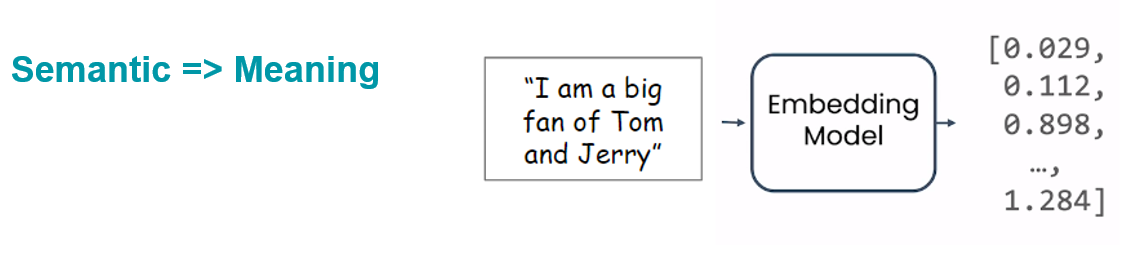

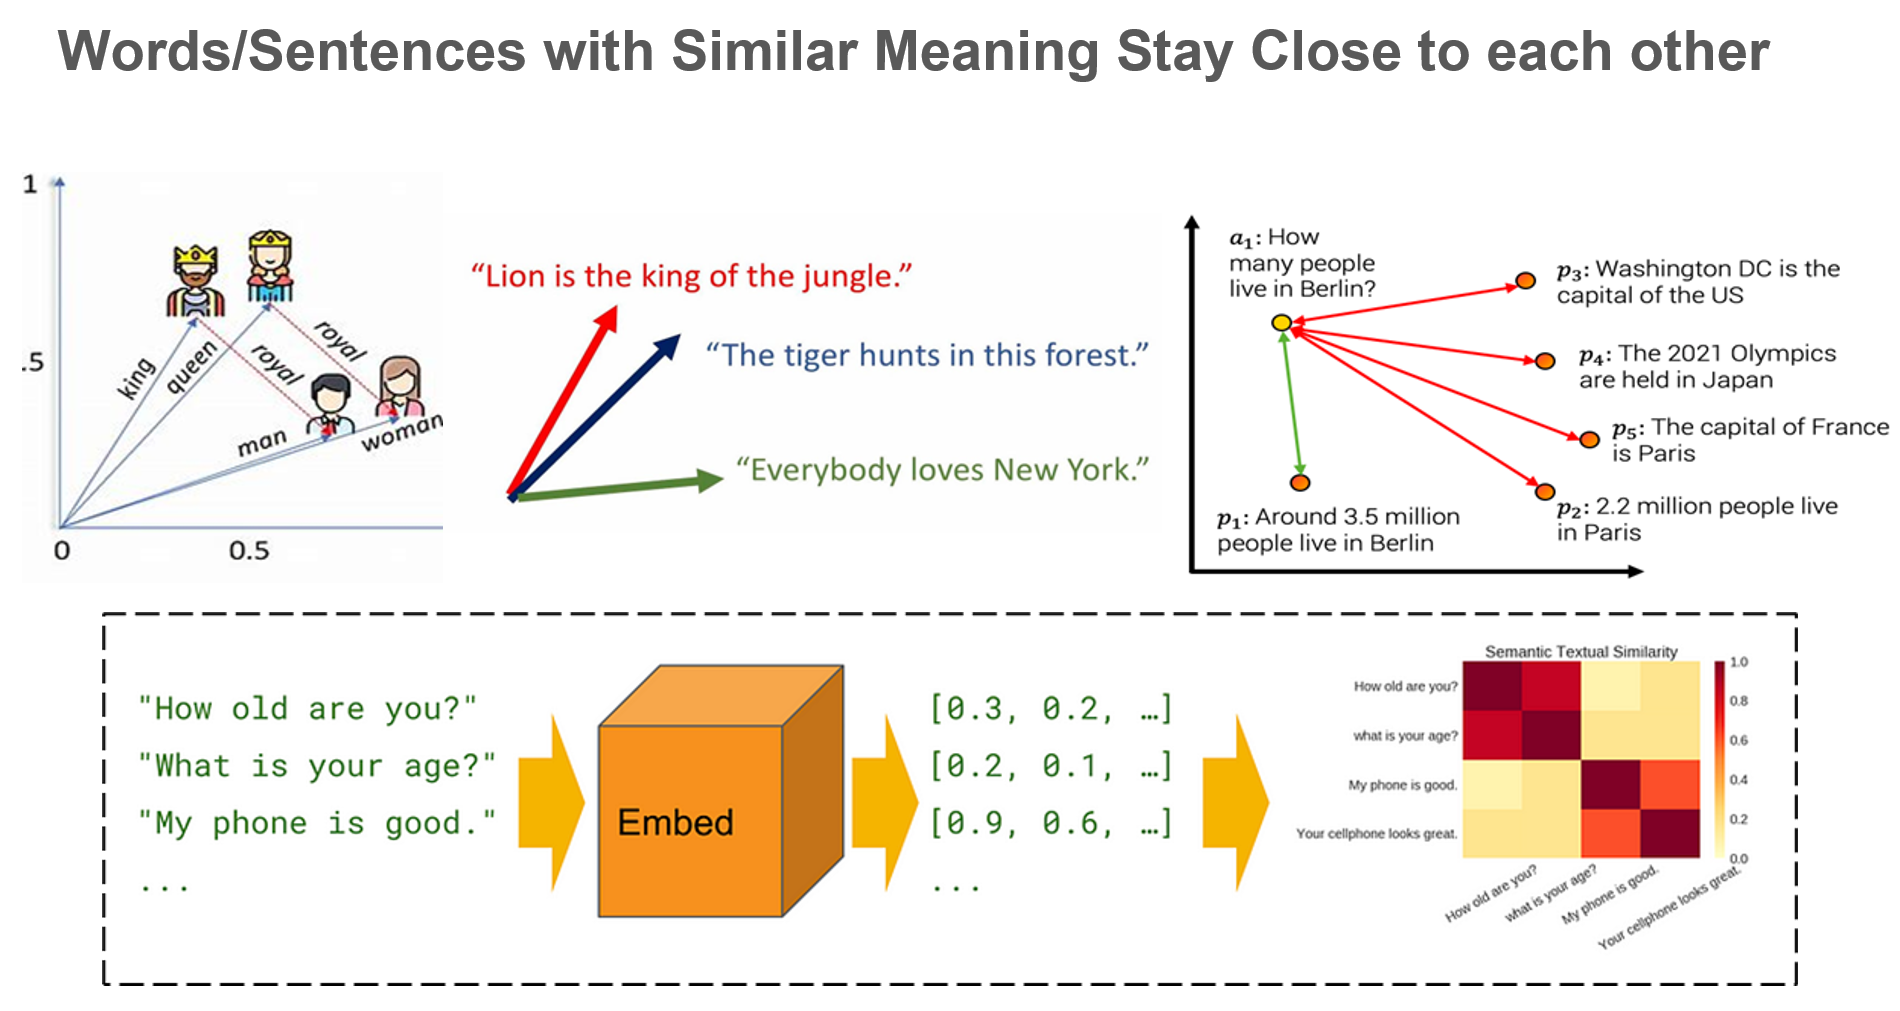

### Setup
Load needed API keys and relevant Python libaries.

In [13]:
!pip install -qU openai==1.12.0 tiktoken==0.6.0 umap-learn==0.5.5 altair==4.2.2 datasets==2.17.0 mplcursors==0.5.3 ipympl==0.9.3 python-dotenv==1.0.1

In [19]:
# load env vars
from dotenv import load_dotenv
import os
import openai
load_dotenv()

# if directly using open ai api key
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_type = "openai"

# if we are using the azure open ai deployed model
# openai.api_type = "azure"
# openai.api_version = os.getenv("AZURE_API_VERSION"),
# openai.api_base = os.getenv("AZURE_OPENAI_ENDPOINT")  # Your Azure OpenAI resource's endpoint value.
# openai.api_key = os.getenv("AZURE_OPENAI_API_KEY")

In [20]:
# Set the embedding model
# If using open ai model directly then "text-embedding-ada-002"
# if using Azure open ai deployed model them set the deployment name
# embedding_model =  "EA-ADAembedding" # Deployment name of "text-embedding-ada-002"
embedding_model = "text-embedding-3-small"

## Embeddings for words, sentences, question answers

Let's make a data set with variety of words, sentences, question answers

In [21]:
import pandas as pd

In [22]:
words_sentences = pd.DataFrame({'text':
  [
      'smartphone',
      'happiness',
      'python',
      "mobile phone",
      'coding',
      "Python developers are wonderful people",
      "Python developers are great people",
      "Have food on time",
      "Eat at the right time",
      "Which sport do people like the most?",
      "Soccer is the liked by a lot of people",
      "Football and soccer are synonyms for the same sport",
      "pear",
      "apple",
      "orange",
      "programming",
      'Where is cricket world cup 2023?',
      'The world cup is in India',
      'What color is the blood?',
      'The blood is red',
      'Where does the lion live?',
      'The lion lives in the the forest',
      'What is an apple?',
      'An apple is a fruit'
  ]})

words_sentences

,text
0,smartphone
1,happiness
2,python
3,mobile phone
4,coding
5,Python developers are wonderful people
6,Python developers are great people
7,Have food on time
8,Eat at the right time
9,Which sport do people like the most?


## **Let's create the embeddings for the text created above**

We are using OpenAI embedding model by the name text-embedding-ada-002 to create embeddings for every word/ sentence in the above list


In [23]:
def get_embedding(text):
  """Custom function to compute the embeddings for a given string
  Return only the embeddings part of the respose as a list"""
  response = openai.embeddings.create(
    input=text,
    model=embedding_model)
  return(response.data[0].embedding)

In [24]:
words_sentences["embedding"] = words_sentences.text.apply(lambda x: get_embedding(x))

In [25]:
words_sentences

,text,embedding
0,smartphone,"[0.012770474888384342, -0.009908330626785755, ..."
1,happiness,"[0.036272790282964706, -0.01564418338239193, 0..."
2,python,"[-0.010241693817079067, -0.011292420327663422,..."
3,mobile phone,"[0.013632549904286861, 0.019469691440463066, -..."
4,coding,"[0.006766573525965214, 0.022077439352869987, 0..."
5,Python developers are wonderful people,"[0.0003118204476777464, -0.03490174561738968, ..."
6,Python developers are great people,"[0.021159177646040916, -0.021970156580209732, ..."
7,Have food on time,"[-0.02010333724319935, 0.015610545873641968, -..."
8,Eat at the right time,"[0.004883043002337217, -0.014187219552695751, ..."
9,Which sport do people like the most?,"[0.053744006901979446, 0.0053769550286233425, ..."


#### Let's explore embeddings

In [26]:
word_1 = words_sentences.embedding[0]

In [27]:
type(word_1)

list

In [28]:
word_1[:10]

[0.012770474888384342,
 -0.009908330626785755,
 -0.06307339668273926,
 0.0016848292434588075,
 -0.0014428747817873955,
 -0.05301753431558609,
 0.022637495771050453,
 0.029081745073199272,
 0.013974345289170742,
 -0.04267840459942818]

In [29]:
print("Length of Embedding Vector: ", len(word_1))

Length of Embedding Vector:  1536


### Compute cosine similarity


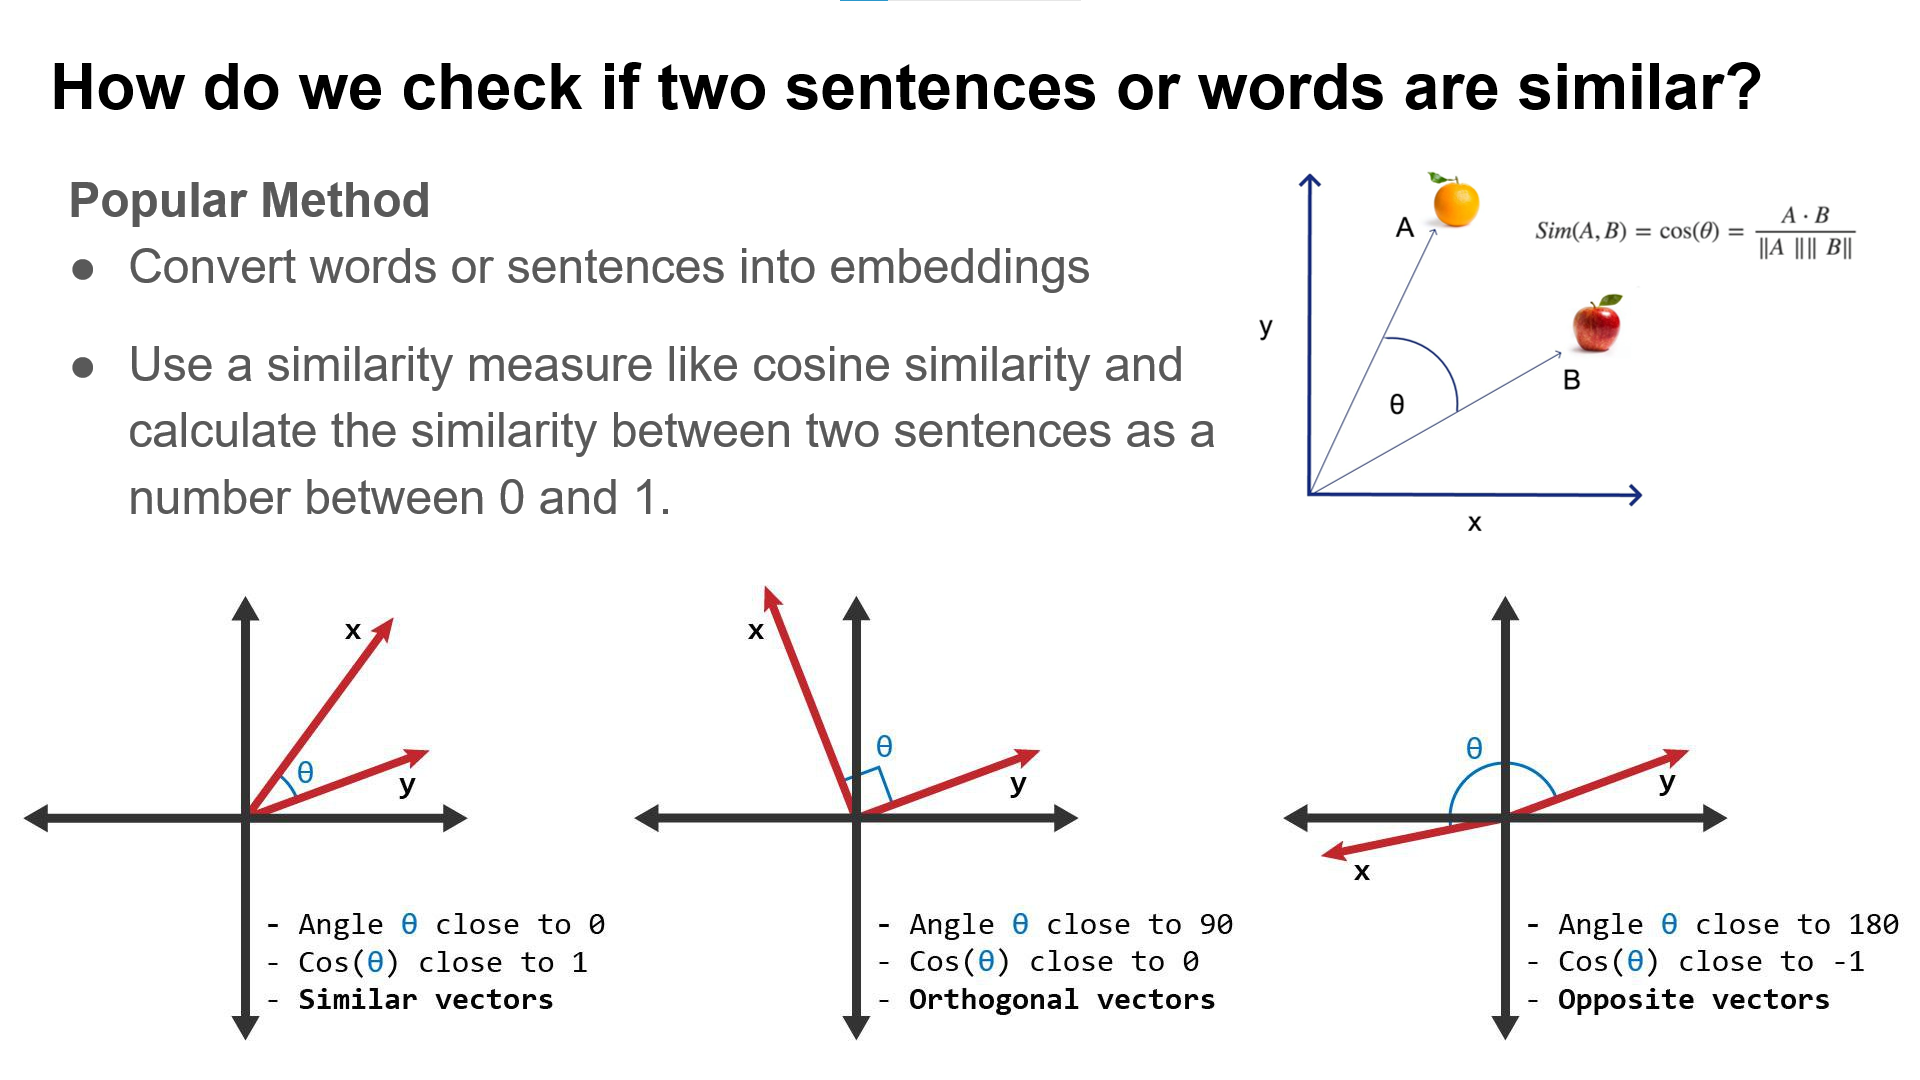

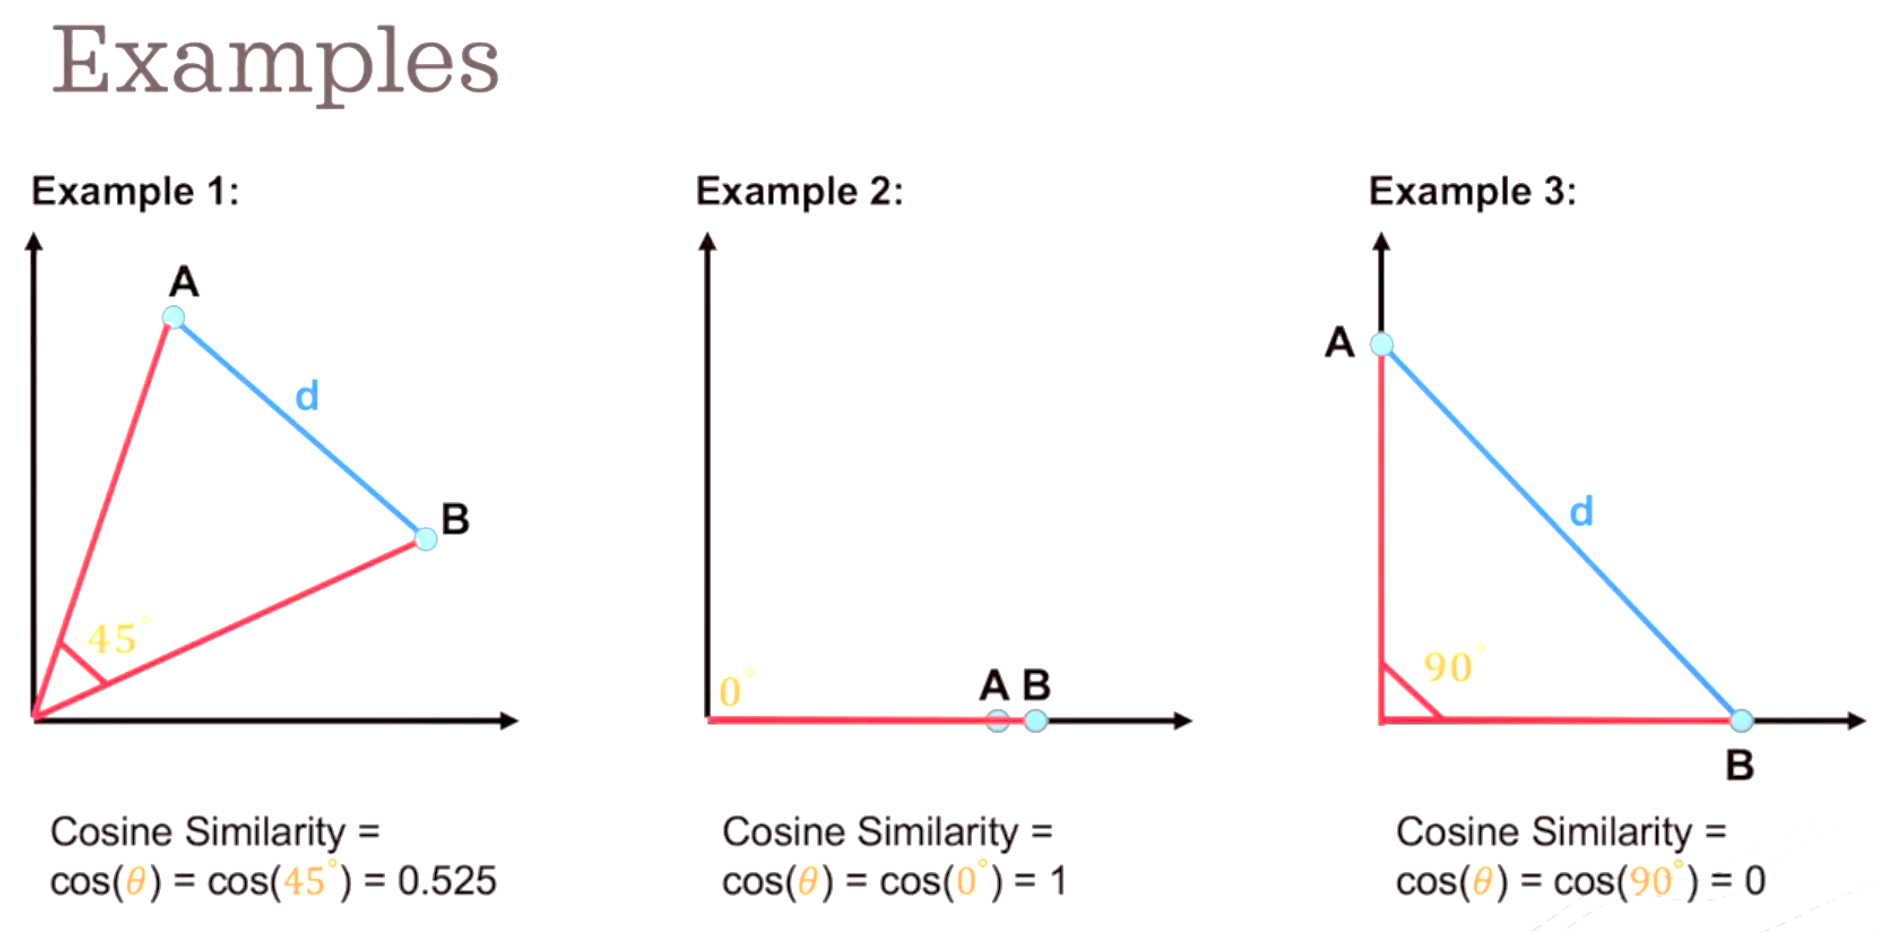

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
# function to compute cosine similarity for 2 given words or sentences
def compute_cosine_similarity(df,idx1,idx2):
  embedding_vec1 = df.embedding[idx1]
  embedding_vec2 = df.embedding[idx2]
  print(f"Cosine similarity between '{df.text[idx1]}' and '{df.text[idx2]}' is...")
  print(cosine_similarity([embedding_vec1],[embedding_vec2]))
  #return cosine_similarity()

In [32]:
words_sentences.text

,text
0,smartphone
1,happiness
2,python
3,mobile phone
4,coding
5,Python developers are wonderful people
6,Python developers are great people
7,Have food on time
8,Eat at the right time
9,Which sport do people like the most?


In [33]:
# Semantically similar words have high similarity
compute_cosine_similarity(words_sentences,0,3)
compute_cosine_similarity(words_sentences,0,13)
compute_cosine_similarity(words_sentences,0,12)
compute_cosine_similarity(words_sentences,0,14)

Cosine similarity between 'smartphone' and 'mobile phone' is...
[[0.75520256]]
Cosine similarity between 'smartphone' and 'apple' is...
[[0.33499725]]
Cosine similarity between 'smartphone' and 'pear' is...
[[0.25837566]]
Cosine similarity between 'smartphone' and 'orange' is...
[[0.23347372]]


In [34]:
# Cosine similarity between 'python' and 'coding'
compute_cosine_similarity(words_sentences,2,4)

Cosine similarity between 'python' and 'coding' is...
[[0.4022343]]


In [35]:
# Sentences that mean the same 'Have food on time' and 'Eat at the right time'
compute_cosine_similarity(words_sentences,7,8)

Cosine similarity between 'Have food on time' and 'Eat at the right time' is...
[[0.68350426]]


In [36]:
#  Cosine similarity between Questions & Answers
compute_cosine_similarity(words_sentences,16,17)
compute_cosine_similarity(words_sentences,18,19)

Cosine similarity between 'Where is cricket world cup 2023?' and 'The world cup is in India' is...
[[0.59393384]]
Cosine similarity between 'What color is the blood?' and 'The blood is red' is...
[[0.65585603]]


In [37]:
# Sentences which are closely related show high similarity
compute_cosine_similarity(words_sentences,9,10)
compute_cosine_similarity(words_sentences,9,11)
compute_cosine_similarity(words_sentences,10,11)


Cosine similarity between 'Which sport do people like the most?' and 'Soccer is the liked by a lot of people' is...
[[0.66151091]]
Cosine similarity between 'Which sport do people like the most?' and 'Football and soccer are synonyms for the same sport' is...
[[0.39208369]]
Cosine similarity between 'Soccer is the liked by a lot of people' and 'Football and soccer are synonyms for the same sport' is...
[[0.5532155]]


In [38]:
# Very similar sentences have a higher cosine similarity
compute_cosine_similarity(words_sentences,5,6)

Cosine similarity between 'Python developers are wonderful people' and 'Python developers are great people' is...
[[0.9440139]]



You can verify that Cosine similarity between 'Python developers are wonderful people' and 'Python developers are great people' 99% is higher than the Cosine similarity between 'Have food on time' and 'Eat at the right time' 92%

In [39]:
words_sentences[["embedding"]].shape

(24, 1)

In [40]:
words_sentences.head()

,text,embedding
0,smartphone,"[0.012770474888384342, -0.009908330626785755, ..."
1,happiness,"[0.036272790282964706, -0.01564418338239193, 0..."
2,python,"[-0.010241693817079067, -0.011292420327663422,..."
3,mobile phone,"[0.013632549904286861, 0.019469691440463066, -..."
4,coding,"[0.006766573525965214, 0.022077439352869987, 0..."


## **Embedding Visualization**

### First let's prepare the data for visulization

PCA (Principal Component Analysis) and UMAP (Uniform Manifold Approximation and Projection) are both popular techniques used for data visualization and dimensionality reduction.

### Quick Refresher

Imagine you have a dataset with lots of data points, each having multiple features. Both PCA and UMAP help us visualize and understand this data better.

**PCA plot**: PCA focuses on finding the most significant directions, or principal components, in the data. It rearranges the features of the data in such a way that it captures the maximum amount of variation. A PCA plot shows how the data points are positioned along these important directions. This helps us get a general idea of how the data is spread and find relationships between the variables.

**UMAP plot**: UMAP also helps us visualize the data, but it takes a different approach. UMAP is more flexible and can capture complex structures and clusters in the data. It tries to preserve the local relationships between points in the original data space. In a UMAP plot, similar points are closer together, and clusters of points with similar characteristics are more apparent. UMAP can reveal intricate structures and subtle patterns that may not be easily visible in a PCA plot.

### Supporting Functions for Visualizaing the beauty of embeddings

In [41]:
import umap
import altair as alt

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

def plot_2D(x_values, y_values, labels):

    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()

def umap_plot(text, emb):

    cols = list(text.columns)
    # UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
    reducer = umap.UMAP(n_neighbors=2)
    umap_embeds = reducer.fit_transform(emb)
    # Prepare the data to plot and interactive visualization
    # using Altair
    #df_explore = pd.DataFrame(data={'text': qa['text']})
    #print(df_explore)

    #df_explore = pd.DataFrame(data={'text': qa_df[0]})
    df_explore = text.copy()
    df_explore['x'] = umap_embeds[:,0]
    df_explore['y'] = umap_embeds[:,1]

    # Plot
    chart = alt.Chart(df_explore).mark_circle(size=60).encode(
        x=#'x',
        alt.X('x',
            scale=alt.Scale(zero=False)
        ),
        y=
        alt.Y('y',
            scale=alt.Scale(zero=False)
        ),
        tooltip=cols
        #tooltip=['text']
    ).properties(
        width=700,
        height=400
    )
    return chart

def umap_plot_big(text, emb):

    cols = list(text.columns)
    # UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
    reducer = umap.UMAP(n_neighbors=100)
    umap_embeds = reducer.fit_transform(emb)
    # Prepare the data to plot and interactive visualization
    # using Altair
    #df_explore = pd.DataFrame(data={'text': qa['text']})
    #print(df_explore)

    #df_explore = pd.DataFrame(data={'text': qa_df[0]})
    df_explore = text.copy()
    df_explore['x'] = umap_embeds[:,0]
    df_explore['y'] = umap_embeds[:,1]

    # Plot
    chart = alt.Chart(df_explore).mark_circle(size=60).encode(
        x=#'x',
        alt.X('x',
            scale=alt.Scale(zero=False)
        ),
        y=
        alt.Y('y',
            scale=alt.Scale(zero=False)
        ),
        tooltip=cols
        #tooltip=['text']
    ).properties(
        width=700,
        height=400
    )
    return chart

### Prepare the data for plotting


In [42]:
import numpy as np

In [43]:
emb_list = words_sentences.embedding.tolist()
embeddings_array = np.array(emb_list)

In [44]:
embeddings_array

array([[ 0.01277047, -0.00990833, -0.0630734 , ...,  0.0088697 ,
        -0.00838579, -0.00299492],
       [ 0.03627279, -0.01564418,  0.0105919 , ..., -0.01584159,
         0.00875359,  0.00132476],
       [-0.01024169, -0.01129242,  0.00995881, ..., -0.05038867,
        -0.00397198,  0.02259639],
       ...,
       [-0.00399465, -0.02644066,  0.00742429, ...,  0.03652602,
        -0.03370699,  0.0362344 ],
       [ 0.00977229, -0.02258514, -0.04256788, ..., -0.0398327 ,
         0.00581889,  0.0160393 ],
       [-0.03376696, -0.00450626, -0.00898968, ..., -0.02363002,
        -0.00294805,  0.03376696]])

PCA is a linear technique that aims to find the most informative directions in the dataset by transforming the original features into a new set of orthogonal axes called principal components. These components capture the maximum amount of variance in the data. A PCA plot shows the data projected onto the principal components, where each point represents a data sample. PCA is useful for finding relationships and patterns within the data, especially when there are a large number of features involved.

In [45]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [46]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (24, 2)
[[-0.36452581  0.00812852]
 [-0.07511625  0.0869327 ]
 [-0.20155875  0.52542487]
 [-0.30913874 -0.02562542]
 [-0.27029735  0.34104013]
 [ 0.12828623  0.61028921]
 [ 0.15384879  0.598117  ]
 [-0.0682918  -0.19710838]
 [-0.05934477 -0.23607021]
 [ 0.5153513   0.05475161]
 [ 0.55828413  0.1503881 ]
 [ 0.40940201  0.055639  ]
 [-0.31037876 -0.07611914]
 [-0.44308963 -0.1074682 ]
 [-0.25035219 -0.1757474 ]
 [-0.35202375  0.4828658 ]
 [ 0.4241348  -0.02046196]
 [ 0.47252215 -0.01839645]
 [ 0.09166112 -0.34230226]
 [ 0.10892043 -0.3381111 ]
 [ 0.25913926 -0.3982994 ]
 [ 0.22678177 -0.3738836 ]
 [-0.34990465 -0.31442441]
 [-0.29430955 -0.28955901]]


Support for third party widgets will remain active for the duration of the session. To disable support:

In [47]:
# Third-party Jupyter widgets : Support for third party widgets (widgets outside of the ipywidgets package) needs to be enabled separately. Support for these widgets will be loaded from a CDN external from Colab.
from google.colab import output
output.enable_custom_widget_manager()

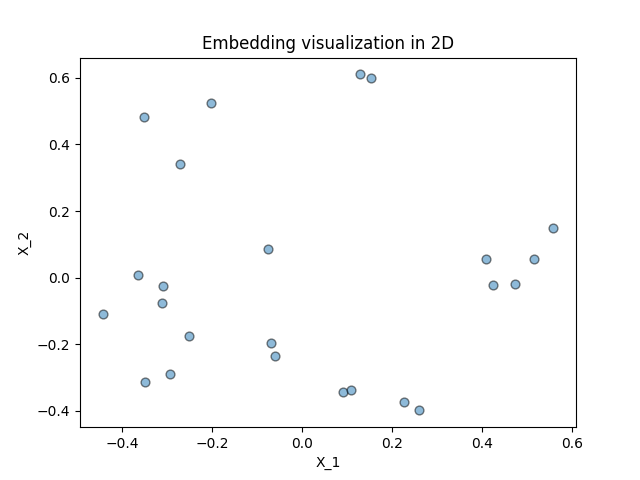

In [49]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

plot_2D(new_values[:,0], new_values[:,1], words_sentences.text)

In [ ]:
#from google.colab import output
#output.disable_custom_widget_manager()

### UMAP plot of Embeddings


UMAP is a non-linear dimensionality reduction technique that preserves local structure and relationships in the data. It creates a low-dimensional representation of the data by considering the similarity between points in the original high-dimensional space and finding a lower-dimensional space that maintains these relationships. UMAP is beneficial in cases where the data distribution may have complex structures or clusters that cannot be easily captured by linear methods like PCA.

UMAP plot provides a more intricate visualization by preserving the local relationships and clusters in the data. It can reveal more detailed structures and subtle patterns that may not be apparent in a PCA plot.

### Let's check the UMAP plot

In [50]:
print(f"Length of the embedding list is {len(emb_list)}")

Length of the embedding list is 24


In [51]:
chart = umap_plot(text=words_sentences[['text']], emb=emb_list)
chart.interactive()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## Embeddings on Large Dataset

In [52]:
!git clone https://github.com/genaiconference/RAG_Workshop_DHS2024.git

Cloning into 'RAG_Workshop_DHS2024'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 54 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (54/54), 29.18 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [53]:
import pandas as pd
wiki_articles = pd.read_pickle('/content/RAG_Workshop_DHS2024/data/wikipedia.pkl')
wiki_articles

,id,title,text,url,wiki_id,views,paragraph_id,langs,emb
0,0,24-hour clock,The 24-hour clock is a way of telling the time...,https://simple.wikipedia.org/wiki?curid=9985,9985,2450.625488,0,30,"[0.07711287587881088, 0.3197174072265625, -0.2..."
1,14,The Dark Knight Trilogy,"The ""Dark Knight"" Series is a set of three Chr...",https://simple.wikipedia.org/wiki?curid=377304,377304,1897.982666,0,13,"[0.2566547989845276, -0.17023412883281708, 0.1..."
2,19,Abella Danger,"Abella Danger (born November 19, 1995) is an A...",https://simple.wikipedia.org/wiki?curid=797944,797944,1748.024170,0,30,"[-0.20083625614643097, -0.14190533757209778, -..."
3,24,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro (born 5 Fe...,https://simple.wikipedia.org/wiki?curid=65655,65655,1564.210449,0,156,"[-0.4638298451900482, -0.0351627953350544, 0.7..."
4,61,Carles Puigdemont,Carles Puigdemont i Casamajó (born 29 December...,https://simple.wikipedia.org/wiki?curid=540154,540154,1542.519531,0,81,"[-0.12089978903532028, 0.06191902980208397, 0...."
...,...,...,...,...,...,...,...,...,...
1995,34633,1st century,"During this period Europe, North Africa and th...",https://simple.wikipedia.org/wiki?curid=24589,24589,122.295425,0,133,"[-0.33043625950813293, -0.234648197889328, -0...."
1996,34653,Operation Restore Hope,The Operation Restore Hope was an operation of...,https://simple.wikipedia.org/wiki?curid=427200,427200,122.192032,0,12,"[0.5195494294166565, -0.06794795393943787, 0.2..."
1997,34655,Rumi,Jalal ad-Din Muhammad Rumi (30 September 1207 ...,https://simple.wikipedia.org/wiki?curid=64995,64995,122.192032,0,101,"[-0.254226416349411, 0.6597043871879578, -0.00..."
1998,34669,Korean War,"The Korean War (Korean: 한국전잴, Russian: Корейск...",https://simple.wikipedia.org/wiki?curid=7537,7537,122.175140,0,120,"[0.22879508137702942, -0.1242295652627945, -0...."


In [54]:
import numpy as np
# from utils import umap_plot_big

In [55]:
articles = wiki_articles[['title', 'text']]
embeds = np.array([d for d in wiki_articles['emb']])

chart = umap_plot_big(articles, embeds)
chart.interactive()

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)